## Import thư viện

In [1]:
import pandas as pd
import numpy as np
import collections as co
import statistics as st

from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

from matplotlib import ticker
import matplotlib.pyplot as plt


## Đọc dữ liệu từ file

In [2]:
df = pd.read_csv('E:\Learn\Bussiness Analyst\IS403.N21.HTTT_Nhom13\Dataset\INTC.csv')


In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,45.959999,47.470001,45.770000,47.080002,41.513241,18774600
1,2019-01-03,46.150002,46.279999,44.389999,44.490002,39.229465,32267300
2,2019-01-04,45.840000,47.570000,45.540001,47.220001,41.636677,35447300
3,2019-01-07,47.099998,48.000000,46.750000,47.439999,41.830650,22736800
4,2019-01-08,47.799999,48.029999,46.779999,47.740002,42.095181,22749200
...,...,...,...,...,...,...,...
1079,2023-04-17,31.950001,32.639999,31.770000,32.139999,32.139999,29601100
1080,2023-04-18,32.430000,32.459999,31.780001,31.830000,31.830000,26041400
1081,2023-04-19,31.100000,31.520000,31.080000,31.150000,31.150000,25746600
1082,2023-04-20,30.760000,31.250000,30.709999,30.860001,30.860001,30255100


## Phân tích dữ liệu

In [4]:
print("Information of Close Price")
print("Number Of Lines: ", len(df.Close))
print(f"Maximum: {max(df.Close)}")
print(f"Minimum: {min(df.Close)}")
print(f"Average: {st.mean(df.Close)}")
print(f"Median: {st.median(df.Close)}")

freq_table = co.Counter(df.Close)
max_freq = max(freq_table.values())
mode_values = [k for k, v in freq_table.items() if v == max_freq]
print("Mode: ", mode_values)

quantile = [np.percentile(df.Close, 25), np.percentile(df.Close, 50), np.percentile(df.Close, 75)]
print("Quantile: ", quantile)

print("Variance: ", st.variance(df.Close))
print("Standard deviation: ", st.stdev(df.Close))
print("Coefficient of Variation: ", st.stdev(df.Close))
print("Coefficient of Skewness: ", df.Close.skew())
print("Coefficient of Kurtosis: ", df.Close.kurtosis())

Information of Close Price
Number Of Lines:  1084
Maximum: 68.470001
Minimum: 24.9
Average: 48.709796947416976
Median: 50.610001
Mode:  [53.439999, 50.919998]
Quantile:  [45.020000499999995, 50.610001, 56.0825015]
Variance:  111.0214850354644
Standard deviation:  10.536673338177682
Coefficient of Variation:  10.536673338177682
Coefficient of Skewness:  -0.7363206124710066
Coefficient of Kurtosis:  -0.25371860478457187


### Trực quan hóa dữ liệu

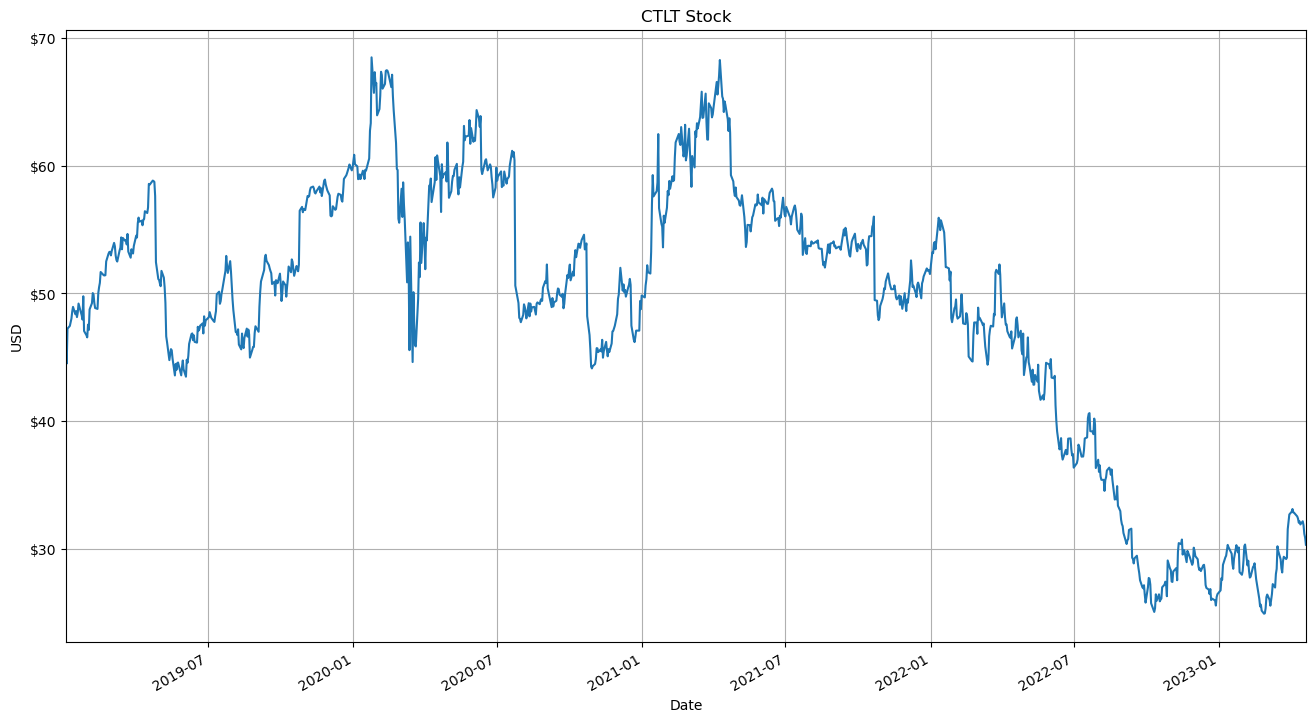

In [5]:
# Chuyển đổi kiểu dữ liệu của cột Date sang datetime64
df['Date'] = pd.to_datetime(df['Date'])

# Đặt cột Date làm index của DataFrame
df.set_index('Date', inplace=True)

# Thư viện vẽ đồ thị
formatter = ticker.StrMethodFormatter('${x:,.0f}')
title = 'CTLT Stock'
ylabel = 'USD'
xlabel = 'Date'

# Vẽ biểu đồ theo index của DataFrame
ax = df['Close'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

# Hiển thị biểu đồ
plt.show()

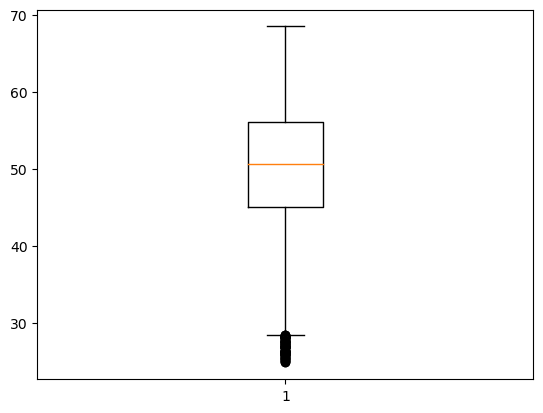

In [6]:
plt.boxplot(df.Close)
plt.show()

## Xây dựng mô hình

### Xử lý dữ liệu

In [7]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

### Chia tập train, test, validation

In [8]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [9]:
# Reshape lại dữ liệu
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
X_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

### Định nghĩa model

In [10]:
!pip install pmdarima

In [11]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2237.439, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2276.343, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2241.120, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2248.031, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2274.378, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2235.936, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2234.638, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2235.681, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2241.119, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2230.560, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2232.379, Time=0.64 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2232.476, Time=0.49 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2237.460, Time=0.12 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2234.430, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0]          

ARIMA(order=(1, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [13]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[53.86370211 53.81886138 53.91828001 53.83645217 53.90380167 53.84836876
 53.89399356 53.85644146 53.88734922 53.86191017 53.88284812 53.86561486
 53.87979893 53.86812454 53.8777333  53.86982468 53.87633398 53.87097642
 53.87538603 53.87175664 53.87474386 53.87228519 53.87430883 53.87264324
 53.87401413 53.8728858  53.87381448 53.87305012 53.87367924 53.87316143]


In [14]:
# 7. Đánh giá độ chính xác validate, test
# Độ lỗi mô hình trên tập test
test_mae = mean_absolute_error(y_pred, y_test)
test_mape = mean_absolute_percentage_error(y_pred, y_test)
test_mse = mean_squared_error(y_pred, y_test)
test_rmse = np.sqrt(test_mse)

print(f"Testing MAE: ", test_mae)
print(f"Testing MAPE: ", test_mape)
print(f"Testing MSE: ", test_mse)
print(f"Testing RMSE: ", test_rmse)



Testing MAE:  4.237319375827053
Testing MAPE:  0.07865331250773797
Testing MSE:  29.75262931294015
Testing RMSE:  5.454597080714592


Validation RMSE: 23.487263053162444
Testing RMSE: 5.454597080714592


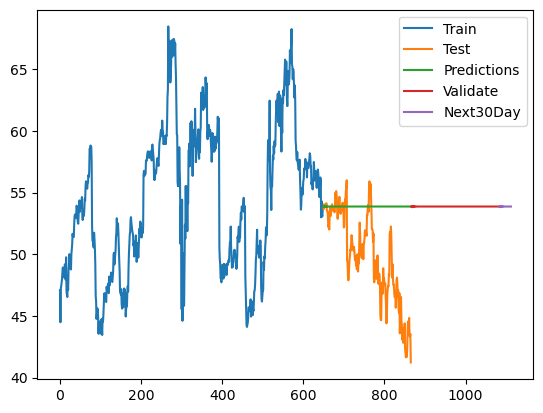

In [15]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [16]:
test_data.index

RangeIndex(start=650, stop=866, step=1)